In [1]:
#Twitter OAuth and text analysis
import sys
import tokeninfo
from textblob import TextBlob
import tweepy
import re
import datetime
#Data Cleaning and Visualization
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
#ML Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
#pull token info from separate file
ckey = tokeninfo.capikey
csec = tokeninfo.capisec
akey = tokeninfo.accstok
asec = tokeninfo.accssec

In [3]:
auth = tweepy.OAuthHandler(ckey, csec)
auth.set_access_token(akey, asec)
api = tweepy.API(auth)

In [4]:
billtweets = [['Timestamp', 'Full_Text', 'Favorites', 'Retweets']]
for tweet in tweepy.Cursor(api.user_timeline, q='github -filter:retweets',screen_name='billratchet',  tweet_mode='extended').items(4000):
    tweettext = str(tweet.full_text)
    if not tweet.in_reply_to_status_id and not tweettext.startswith('RT @'):
        billtweets.append([tweet.created_at, tweet.full_text, tweet.favorite_count, tweet.retweet_count])

In [5]:
billtweets

[['Timestamp', 'Full_Text', 'Favorites', 'Retweets'],
 [datetime.datetime(2019, 3, 28, 3, 46, 42),
  "me pulling up to cardi b's house knowing dam well she gone rob me anyways but the coochie so god damn worth it https://t.co/rc2DRKMZmt",
  8604,
  946],
 [datetime.datetime(2019, 3, 28, 3, 31, 37),
  'how can i give my xxl vote to rico and valee at the same time',
  784,
  29],
 [datetime.datetime(2019, 3, 28, 1, 48, 25),
  'back it up terry!!!!!!',
  3562,
  698],
 [datetime.datetime(2019, 3, 26, 22, 44, 14),
  'yeah no problem it says \n\nIT GOES \nIT GOES\nIT GOES \nIT GOES\nIT GOES\nIT GOES\nIT GOES\nIT GOES \nGUILLOOOOOOOOOOOOOOTINE YAH https://t.co/egfsxZUFUN',
  5586,
  895],
 [datetime.datetime(2019, 3, 26, 22, 37, 11),
  'this man @ilovesmokingmid just in the shower right now https://t.co/UhtTZC0HeQ',
  540,
  17],
 [datetime.datetime(2019, 3, 26, 18, 40, 19),
  'REFUNDS? WHERE https://t.co/uC9frikhVp',
  3485,
  226],
 [datetime.datetime(2019, 3, 26, 18, 6, 44),
  "fuck drugs

In [7]:
data = pd.DataFrame(billtweets[1:],columns=billtweets[0])
data

,Timestamp,Full_Text,Favorites,Retweets
0,2019-03-28 03:46:42,me pulling up to cardi b's house knowing dam w...,8604,946
1,2019-03-28 03:31:37,how can i give my xxl vote to rico and valee a...,784,29
2,2019-03-28 01:48:25,back it up terry!!!!!!,3562,698
3,2019-03-26 22:44:14,yeah no problem it says \n\nIT GOES \nIT GOES\...,5586,895
4,2019-03-26 22:37:11,this man @ilovesmokingmid just in the shower r...,540,17
5,2019-03-26 18:40:19,REFUNDS? WHERE https://t.co/uC9frikhVp,3485,226
6,2019-03-26 18:06:44,fuck drugs i'm bout to be off these gas statio...,29870,6565
7,2019-03-25 19:47:44,bro i'm jus blasting the halo theme song feeli...,4571,891
8,2019-03-25 19:28:28,in elementary school they always ask what you ...,4839,624
9,2019-03-25 19:16:18,u ever be high as shit in the Toyota Prius,10792,1721


In [8]:
analysis = ([])
for tweet in data['Full_Text']:
    analysis.append(TextBlob(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())).sentiment.polarity)

In [9]:
for tweet in analysis:
    print(tweet)

0.3
0.0
0.0
0.0
0.2857142857142857
0.0
-0.2
0.24285714285714285
0.10000000000000002
-0.020000000000000004
0.0
0.2857142857142857
-0.5
-0.2
-0.175
-0.25
0.15
-0.19791666666666669
-0.1125
0.033333333333333326
-0.37142857142857144
-0.4
0.0
0.0
0.0
-0.4
-0.12121212121212122
0.0
-0.2
0.04999999999999999
0.0
0.2
-0.21666666666666665
-0.625
0.2
0.0
0.0
0.06190476190476191
-0.6
-0.15454545454545457
0.0
-0.7
-0.05
-0.19999999999999998
0.18333333333333332
0.55
0.0
0.06439393939393938
0.0
0.09375
0.0
-0.4
0.0
-0.4
0.0
0.375
0.0
0.0
0.0
0.0
0.0
-0.6
-0.025
0.5
-0.0666666666666667
-0.2
-0.06964285714285715
-0.1
0.027083333333333334
0.04999999999999999
0.16
0.0
-0.625
-0.025000000000000022
0.0
0.0
0.0
0.0
0.0
0.07666666666666667
-0.25
-0.30000000000000004
-0.025
-0.025
0.06893939393939393
0.2125
0.0
0.4333333333333333
0.3333333333333333
0.2
0.0
0.4333333333333333
0.0
0.0
0.0
-0.6
0.0
-0.6
0.0
0.41818181818181815
0.0
0.25
0.0
-0.25
-0.16
0.0
-0.16666666666666666
0.0
-0.2
-0.2
0.0
0.0
-0.15
0.8
0.5
0.

In [10]:
data['Sentiment'] = analysis
data

,Timestamp,Full_Text,Favorites,Retweets,Sentiment
0,2019-03-28 03:46:42,me pulling up to cardi b's house knowing dam w...,8604,946,0.300000
1,2019-03-28 03:31:37,how can i give my xxl vote to rico and valee a...,784,29,0.000000
2,2019-03-28 01:48:25,back it up terry!!!!!!,3562,698,0.000000
3,2019-03-26 22:44:14,yeah no problem it says \n\nIT GOES \nIT GOES\...,5586,895,0.000000
4,2019-03-26 22:37:11,this man @ilovesmokingmid just in the shower r...,540,17,0.285714
5,2019-03-26 18:40:19,REFUNDS? WHERE https://t.co/uC9frikhVp,3485,226,0.000000
6,2019-03-26 18:06:44,fuck drugs i'm bout to be off these gas statio...,29870,6565,-0.200000
7,2019-03-25 19:47:44,bro i'm jus blasting the halo theme song feeli...,4571,891,0.242857
8,2019-03-25 19:28:28,in elementary school they always ask what you ...,4839,624,0.100000
9,2019-03-25 19:16:18,u ever be high as shit in the Toyota Prius,10792,1721,-0.020000


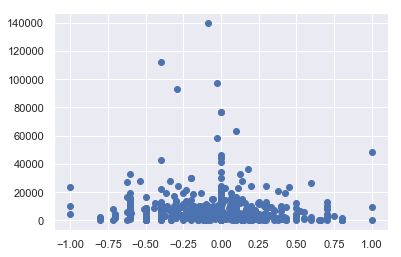

In [11]:
plt.scatter(data['Sentiment'], data['Favorites'])

In [12]:
data_day = data.copy()
time_weekdays = ([])
for time in data_day['Timestamp']:
    time_weekdays.append(time.weekday())
time_weekdays

[3,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 1,
 0,
 0,
 6,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 3,
 2,
 1,
 1,
 0,
 0,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 6,
 6,
 5,
 5,
 5,
 5,


In [13]:
data_day['Timestamp'] = time_weekdays
data_day

,Timestamp,Full_Text,Favorites,Retweets,Sentiment
0,3,me pulling up to cardi b's house knowing dam w...,8604,946,0.300000
1,3,how can i give my xxl vote to rico and valee a...,784,29,0.000000
2,3,back it up terry!!!!!!,3562,698,0.000000
3,1,yeah no problem it says \n\nIT GOES \nIT GOES\...,5586,895,0.000000
4,1,this man @ilovesmokingmid just in the shower r...,540,17,0.285714
5,1,REFUNDS? WHERE https://t.co/uC9frikhVp,3485,226,0.000000
6,1,fuck drugs i'm bout to be off these gas statio...,29870,6565,-0.200000
7,0,bro i'm jus blasting the halo theme song feeli...,4571,891,0.242857
8,0,in elementary school they always ask what you ...,4839,624,0.100000
9,0,u ever be high as shit in the Toyota Prius,10792,1721,-0.020000


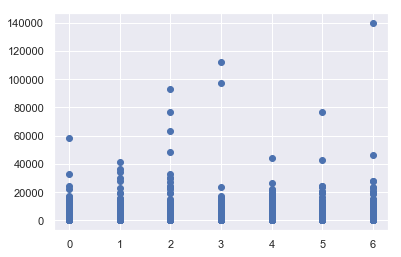

In [14]:
plt.scatter(data_day['Timestamp'], data_day['Favorites'])

In [15]:
data_ts = data.copy()
data_ts.set_index('Timestamp', inplace=True)
data_ts.index

DatetimeIndex(['2019-03-28 03:46:42', '2019-03-28 03:31:37',
               '2019-03-28 01:48:25', '2019-03-26 22:44:14',
               '2019-03-26 22:37:11', '2019-03-26 18:40:19',
               '2019-03-26 18:06:44', '2019-03-25 19:47:44',
               '2019-03-25 19:28:28', '2019-03-25 19:16:18',
               ...
               '2018-10-06 22:58:23', '2018-10-05 21:17:55',
               '2018-10-05 20:27:24', '2018-10-05 10:47:49',
               '2018-10-05 08:14:24', '2018-10-05 06:47:32',
               '2018-10-05 06:31:44', '2018-10-05 06:18:06',
               '2018-10-05 05:05:27', '2018-10-04 21:53:12'],
              dtype='datetime64[ns]', name='Timestamp', length=732, freq=None)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


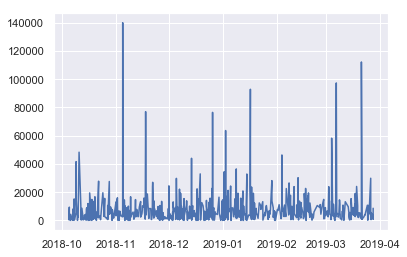

In [16]:
ts = data_ts['Favorites']
plt.plot(ts)

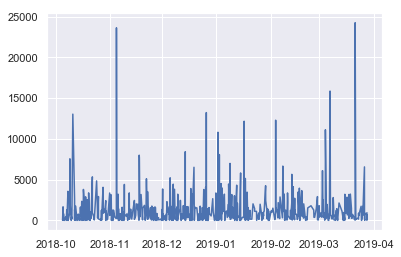

In [19]:
ts = data_ts['Retweets']
plt.plot(ts)

In [22]:
data_hour = data.copy()
time_hours = ([])
for time in data_hour['Timestamp']:
    time_hours.append(time.hour)
time_hours

[3,
 3,
 1,
 22,
 22,
 18,
 18,
 19,
 19,
 19,
 8,
 1,
 22,
 20,
 10,
 9,
 8,
 19,
 20,
 20,
 18,
 10,
 10,
 19,
 18,
 13,
 20,
 18,
 7,
 7,
 7,
 16,
 6,
 6,
 6,
 21,
 20,
 20,
 16,
 22,
 18,
 3,
 12,
 12,
 10,
 10,
 20,
 18,
 16,
 16,
 15,
 15,
 15,
 21,
 4,
 9,
 0,
 21,
 21,
 21,
 18,
 17,
 8,
 5,
 6,
 6,
 3,
 3,
 21,
 13,
 4,
 3,
 7,
 1,
 17,
 16,
 16,
 8,
 7,
 21,
 9,
 8,
 23,
 9,
 8,
 8,
 0,
 0,
 0,
 9,
 2,
 0,
 17,
 9,
 6,
 19,
 1,
 19,
 8,
 21,
 20,
 3,
 5,
 20,
 16,
 3,
 6,
 21,
 6,
 6,
 4,
 4,
 1,
 22,
 23,
 21,
 11,
 4,
 3,
 0,
 19,
 20,
 18,
 11,
 10,
 17,
 16,
 15,
 7,
 6,
 22,
 3,
 0,
 20,
 19,
 19,
 18,
 18,
 6,
 1,
 23,
 23,
 18,
 10,
 10,
 9,
 8,
 4,
 4,
 3,
 22,
 17,
 8,
 7,
 21,
 21,
 17,
 9,
 9,
 15,
 6,
 5,
 1,
 19,
 10,
 10,
 0,
 19,
 10,
 4,
 4,
 9,
 3,
 3,
 4,
 22,
 22,
 21,
 21,
 21,
 18,
 10,
 7,
 18,
 17,
 7,
 5,
 20,
 18,
 9,
 23,
 22,
 22,
 5,
 3,
 8,
 23,
 23,
 17,
 16,
 4,
 4,
 1,
 0,
 20,
 0,
 17,
 7,
 4,
 1,
 22,
 20,
 20,
 22,
 6,
 7,
 4,
 2,
 7,
 6,
 5

In [23]:
data_hour['Timestamp'] = time_hours
data_hour

,Timestamp,Full_Text,Favorites,Retweets,Sentiment
0,3,me pulling up to cardi b's house knowing dam w...,8604,946,0.300000
1,3,how can i give my xxl vote to rico and valee a...,784,29,0.000000
2,1,back it up terry!!!!!!,3562,698,0.000000
3,22,yeah no problem it says \n\nIT GOES \nIT GOES\...,5586,895,0.000000
4,22,this man @ilovesmokingmid just in the shower r...,540,17,0.285714
5,18,REFUNDS? WHERE https://t.co/uC9frikhVp,3485,226,0.000000
6,18,fuck drugs i'm bout to be off these gas statio...,29870,6565,-0.200000
7,19,bro i'm jus blasting the halo theme song feeli...,4571,891,0.242857
8,19,in elementary school they always ask what you ...,4839,624,0.100000
9,19,u ever be high as shit in the Toyota Prius,10792,1721,-0.020000


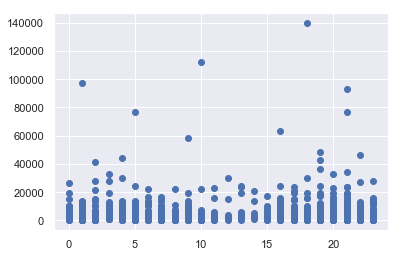

In [24]:
plt.scatter(data_hour['Timestamp'], data_hour['Favorites'])